Using some random walkers as an example

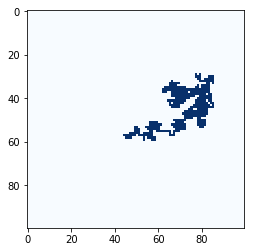

In [1]:
%matplotlib inline
import sys
sys.path.append("../")
import wonky as w
size = (100,2)
lattice = w.lattice.get_hyper_lattice(*size)
w.lattice.walk_lattice_from(lattice, size, walk_length=1000)
w.plotting.display(lattice,0)

In [14]:
#sample 20 random walks and take the euclidean displacements from the origin
import numpy as np
results = []
for i in range(20): results.append(w.lattice.lattice_walk_displacements(lattice, size, walk_length=1000))
results = np.stack(results)
results.shape

(20, 1000)

In [17]:
import pandas as pd
data = pd.DataFrame(results)
data.T.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2.000000,0.000000,1.414214,0.000000,0.000000,1.414214,0.000000,0.000000,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,2.000000,1.414214,1.414214,1.414214,1.414214
2,1.000000,1.000000,2.236068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.236068,2.236068,1.000000,1.000000,1.000000,1.000000,2.236068,1.000000,1.000000,1.000000,2.236068
3,1.414214,1.414214,2.000000,2.000000,2.000000,1.414214,0.000000,2.000000,2.000000,3.162278,2.828427,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.828427
4,2.236068,2.236068,2.236068,2.236068,1.000000,2.236068,1.000000,2.236068,2.236068,3.000000,3.605551,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.236068,1.000000,2.236068
5,1.414214,2.000000,3.162278,1.414214,2.000000,2.000000,2.000000,2.828427,3.162278,2.000000,4.242641,2.000000,1.414214,1.414214,1.414214,2.000000,1.414214,2.000000,1.414214,2.828427
6,2.236068,2.236068,3.000000,2.236068,2.236068,3.000000,2.236068,2.236068,4.123106,1.000000,5.000000,2.236068,2.236068,2.236068,1.000000,1.000000,2.236068,3.000000,2.236068,3.605551


In [95]:
#generally it is convenient to move to and from pivoted and unpivoted data
# pivot with: unstacked.pivot("time", "sample", "disp")
#here we unpivot the data above
unstacked=data.unstack().reset_index()
unstacked.columns = ["time", "sample", "disp"]
unstacked.tail()

,time,sample,disp
19995,999,15,20.880613
19996,999,16,10.770330
19997,999,17,8.602325
19998,999,18,38.078866
19999,999,19,36.249138


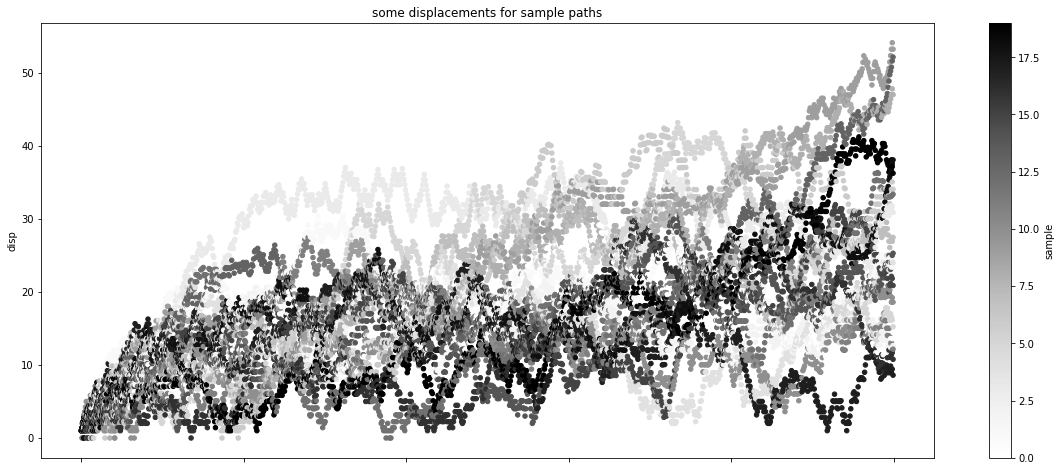

In [96]:
unstacked.plot(kind='scatter',x='time',y='disp', c='sample',figsize=(20,8), title="some displacements for sample paths")

# 01 Moments and errors

In [42]:
#it is convenient to join errors and means for downstream processing
def standard_error(data):return pd.DataFrame(data.std()/np.sqrt(data.count()), columns=["error"])
stats = pd.DataFrame(data.mean(axis=1), columns= ["mean"]).join(standard_error(data))
stats.head()

,mean,error
0,15.988500,0.000000
1,19.128977,0.162317
2,14.812312,0.122791
3,27.587785,0.239356
4,13.345310,0.183688


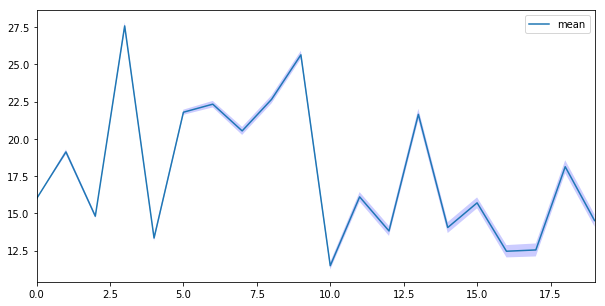

In [63]:
#here we plot, later we could power fit the data points using these errors 
ax = stats[["mean"]].plot(figsize=(10,5))
ax.fill_between(stats.index, stats["mean"]-stats["error"], stats["mean"]+stats["error"], 
                alpha=.2,  facecolor='blue', linewidth=0)

# 02 Fitting 

TODO

# 03 Movies
Some snippets for plotting image data. Do some walks and copy the lattice for each time step

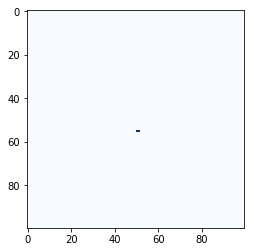

In [79]:
snaps = []
l = w.lattice.get_hyper_lattice(*size)
i = 5550
for n in range(1000):
    w.lattice.put(l,i,1)
    i = w.lattice.diffuse(i,*size) 
    #expensive but whatever
    snaps.append(l.copy())
w.plotting.display(snapsnots[1],0)

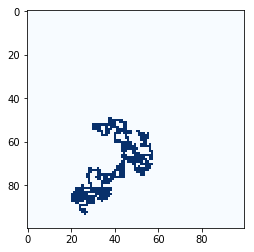

In [97]:
#the final state looks like this
w.plotting.display(snapsnots[-1],0)

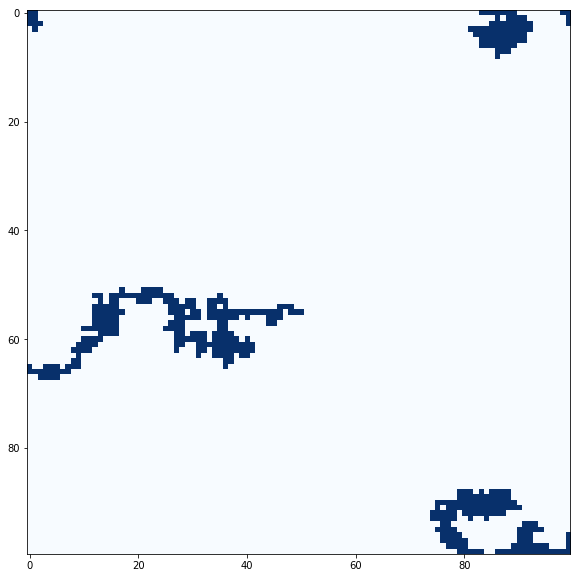

In [98]:
#this is a useful snippet for animating any 2D data. Here 1D is reshaped to 2D and animated
#It takes a moment depending on how many frames you want to have
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
#reshape the flat lattice vectors into 2d images
#dont take all 1000 of them because it will take awhile to animate that - take every 10 or so
images = [im.reshape(size[0],size[0]) for im in snaps[::10]]
#init the plot
fig = plt.figure(figsize=(10,10))
im = plt.imshow(images[0],"Blues")
#create an updated function that is called to the animation routine
#this simply replaces the image data by the next image in the sequence
def updatefig(j):
    im.set_array(images[j])
    return [im]
#make the animation and show in the html frame for jupyer
ani = animation.FuncAnimation(fig, updatefig, frames=range(len(images)),  blit=True)
HTML(ani.to_html5_video())
#maybe save it
#ani.save('random_walker.mp4', fps=10)

In [85]:
#ok